Лабораторная работа №4
Интервальные оценки.
Вариант 10. Y = ln(x); a = 1; b = 5; y0 = 1

Задание 1. Доверительный интервал для математического ожидания СВ.

1.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку математического ожидания случайной величины.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

n = 20 #задается вручную

# найдены в 1-й ЛР
a = 1.
b = 5.

# формируем выборку
def get_sample(n):
    sample_X = []
    sample_Y = []
    uniform_rv = sts.uniform()
    sample_xi = uniform_rv.rvs(size=n)

    for i in range(n):
        x = sample_xi[i] * (b - a) + a
        sample_X.append(x)
        y = np.log(x)
        sample_Y.append(y)
    return sample_Y

sample_Y = get_sample(n)

In [28]:
EV = sum(sample_Y) / n
print(EV)

1.071511031689678


1.2. Найти точечную оценку дисперсии случайной величины.

In [29]:
def empirical_D(sample_Y, EV):
    D0 = 0.
    for i in sample_Y:
        D0 += (i - EV) ** 2
    D0 = D0 / (len(sample_Y) - 1)
    return D0
D0 = empirical_D(sample_Y, EV)
print(D0)

0.2574169533498667


1.3. Найти доверительный интервал для оценки математического ожидания случайной величины для различных уровней значимости.

In [30]:
gammas = [0.9, 0.95, 0.98, 0.99]
t_rv = sts.t(19)
arr = t_rv.rvs(1000000)

ts = []
for i in gammas:
    tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
    ts.append(tmp[0])
    
#ts = [1.73, 2.093, 2.54, 2.861]
intervals = []

for i in ts:
    intervals.append((EV - np.sqrt(D0) * i / np.sqrt(n - 1), EV + np.sqrt(D0) * i / np.sqrt(n - 1)))
    
intervals

[(0.8699451077115747, 1.2730769556677815),
 (0.8279457582493118, 1.3150763051300443),
 (0.7769708166185434, 1.3660512467608128),
 (0.7393768076279172, 1.403645255751439)]

1.4. Построить график зависимости величины доверительного интервала от уровня значимости.

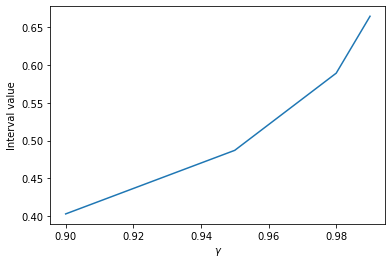

In [31]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.5. Найти теоретическое значение дисперсии случайной величины по известной плотности распределения ( задание 2, п.3).

In [32]:
import scipy.integrate as integrate
DY = integrate.quad(lambda x: ((x ** 2 * np.exp(x)) / 4), np.log(1), np.log(5))[0] - (integrate.quad(lambda x: ((x * np.exp(x)) / 4), np.log(1), np.log(5))[0])**2 

print(DY)

0.19053425188117634


1.6. Найти доверительный интервал для оценки математического ожидания случайной величины при известной дисперсии для различных уровней значимости.

In [33]:
intervals2 = []

for i in ts:
    intervals2.append((EV - np.sqrt(DY) * i / np.sqrt(n - 1), EV + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
intervals2

[(0.8980966665660429, 1.2449253968133132),
 (0.861963125842189, 1.281058937537167),
 (0.8181075625324188, 1.3249145008469374),
 (0.7857640935923518, 1.3572579697870044)]

1.7. Построить график зависимости величины доверительного интервала от уровня значимости.

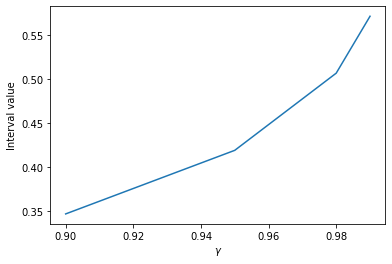

In [34]:

plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.8. Сравнить результаты, полученные по п.п. 1.4, 1.7.

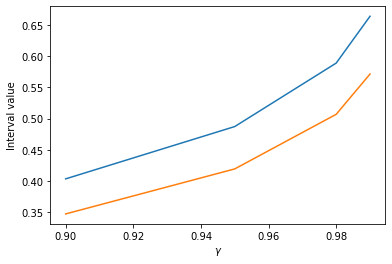

In [35]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

1.9. Повторить п.п. 1.2 – 1.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

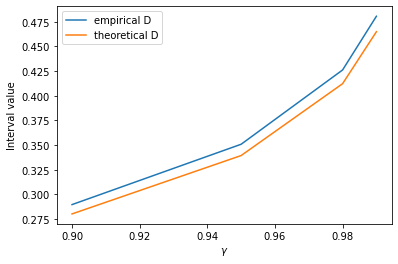

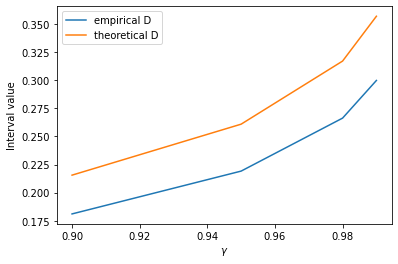

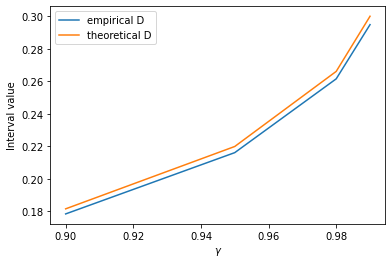

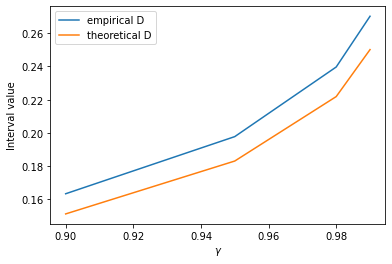

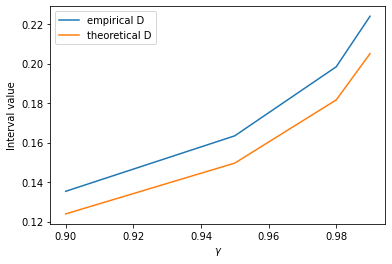

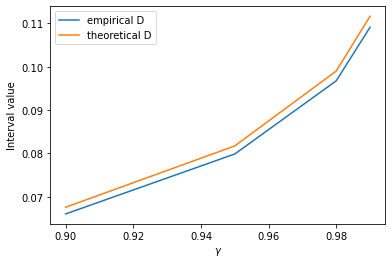

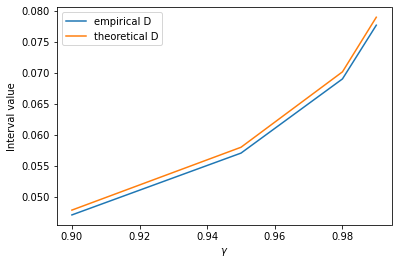

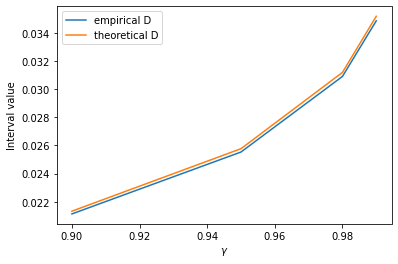

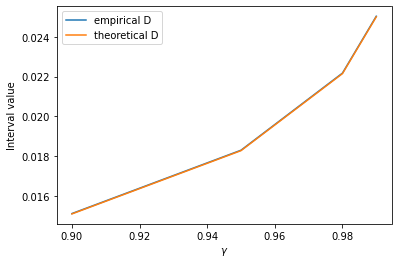

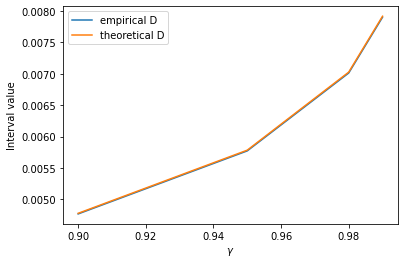

In [36]:
# напишем функцию, объединяющую шаги
def ev_routine(n):
    sample_Y = get_sample(n)
    EV = sum(sample_Y) / n
    D0 = empirical_D(sample_Y, EV)
    gammas = [0.9, 0.95, 0.98, 0.99]
    t_rv = sts.t(19)
    arr = t_rv.rvs(1000000)
    
    ts = []
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[1-(1-i)/2])
        ts.append(tmp[0])
        
    intervals = []

    for i in ts:
        intervals.append((EV - np.sqrt(D0) * i / np.sqrt(n - 1), EV + np.sqrt(D0) * i / np.sqrt(n - 1)))
    
    intervals2 = []

    for i in ts:
        intervals2.append((EV - np.sqrt(DY) * i / np.sqrt(n - 1), EV + np.sqrt(DY) * i / np.sqrt(n - 1)))
    
    plt.plot(gammas, [i[1] - i[0] for i in intervals], label="empirical D")
    plt.plot(gammas, [i[1] - i[0] for i in intervals2], label='theoretical D')
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.legend(loc='upper left')
    plt.show()
    return intervals2

evs = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
ints = []

for i in evs:
    ints.append(ev_routine(i))

1.10. Построить графики зависимости величины доверительного интервала от объема выборки.

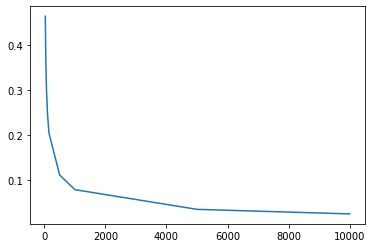

In [37]:

# для уровня 0.99
plt.plot(evs[:-1], [(i[-1][1] - i[-1][0]) for i in ints[:-1]])

Задание 2. Доверительный интервал для дисперсии СВ.

2.1. В соответствии с вариантом (см. задание 1) сформировать выборку из 20 случайных чисел. Найти точечную оценку дисперсии случайной величины.

In [38]:
n = 20
sample_Y = get_sample(n)
EV = sum(sample_Y) / n
D0 = empirical_D(sample_Y, EV)
print(D0)

0.24282997892312944


2.2. Найти точечную оценку математического ожидания случайной величины.

In [39]:
print(EV)

0.9801442986306199


2.3. Найти доверительный интервал для оценки дисперсии случайной величины для различных уровней значимости.

In [40]:
gammas = [0.9, 0.95, 0.98, 0.99]

chi2_rv = sts.chi2(19)
arr = chi2_rv.rvs(100000)

chip = []
chim = []
for i in gammas:
    tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
    chip.append(tmp[0])
    chim.append(tmp[1])

intervals = []

for i in range(len(chim)):
    intervals.append(((n-1) * D0 / chim[i], (n - 1) * D0 / chip[i]))
    
intervals

[(0.15317653277993473, 0.45533574058240184),
 (0.14052693372582573, 0.5192682042911012),
 (0.12718749259915163, 0.6089559722478791),
 (0.1190128859772793, 0.67783436957932)]

2.4. Построить график зависимости величины доверительного интервала от уровня значимости.

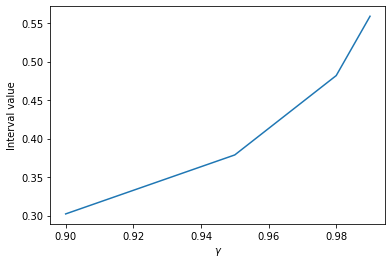

In [41]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()


2.5. Найти теоретическое значение математического ожидания случайной величины по известной плотности распределения ( задание 2, п.3).

In [50]:
import scipy.integrate as integrate
MY = integrate.quad(lambda x: (x * np.exp(x)/ 4), np.log(1), np.log(5))[0]
print(MY)

1.0117973905426254


2.6. Найти доверительный интервал для оценки дисперсии случайной величины при известном математическом ожидании для различных уровней значимости.

In [51]:
intervals2 = []

for i in range(len(chim)):
    intervals2.append((n * empirical_D(sample_Y, MY) / chim[i], n * empirical_D(sample_Y, MY) / chip[i]))
    
intervals2

[(0.16193874084137352, 0.481382462129),
 (0.14856554257272214, 0.5489720757857324),
 (0.13446304096639122, 0.6437902829105803),
 (0.12582081960784008, 0.7166087540731975)]

2.7. Построить график зависимости величины доверительного интервала от уровня значимости.

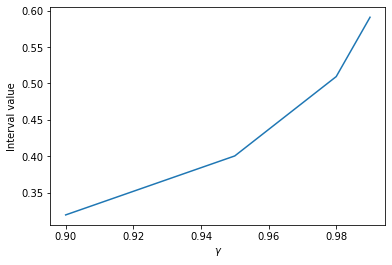

In [52]:
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.8. Сравнить результаты, полученные по п.п. 2.4, 2.7.

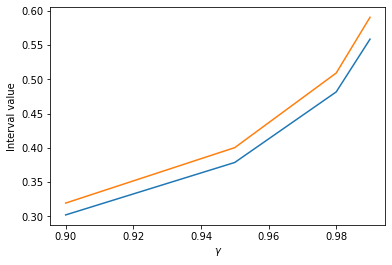

In [53]:
plt.plot(gammas, [i[1] - i[0] for i in intervals])
plt.plot(gammas, [i[1] - i[0] for i in intervals2])
plt.xlabel("$\gamma$")
plt.ylabel("Interval value")
plt.show()

2.9. Повторить п.п. 2.2 – 2.8. для различного объема выборки: n = 30, 50, 70, 100, 150.

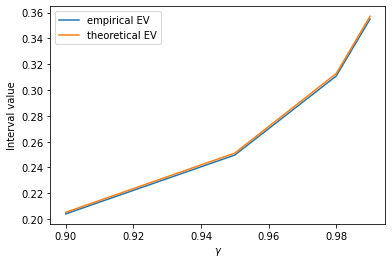

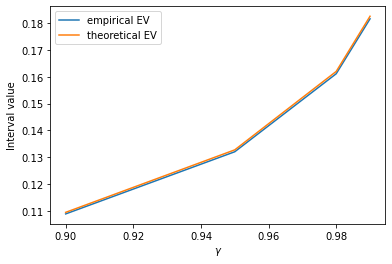

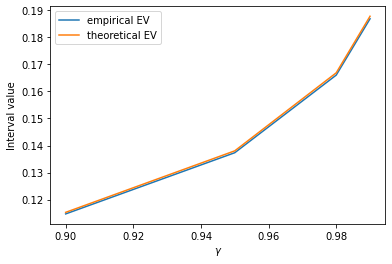

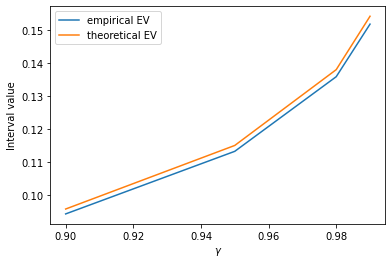

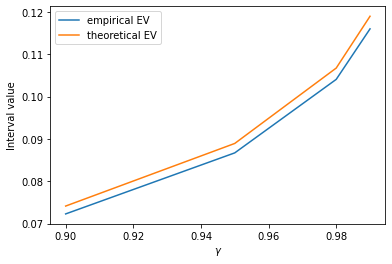

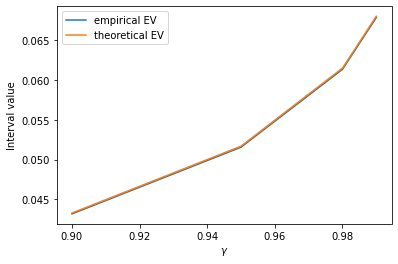

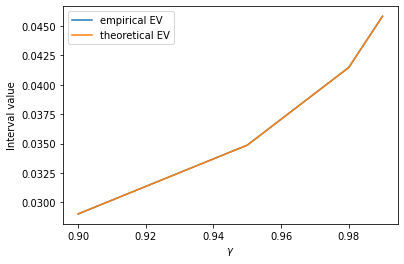

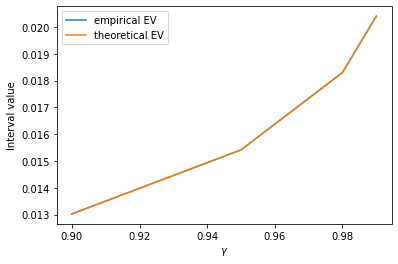

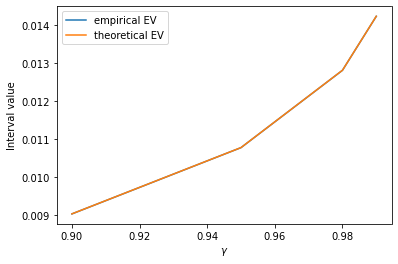

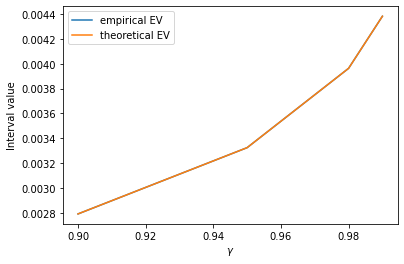

In [54]:
# напишем функцию, объединяющую шаги
def d_routine(n):
    sample_Y = get_sample(n)
    EV = sum(sample_Y) / n
    D0 = empirical_D(sample_Y, EV)
    gammas = [0.9, 0.95, 0.98, 0.99]
    chi2_rv = sts.chi2(n - 1)
    arr = chi2_rv.rvs(100000)

    chip = []
    chim = []
    for i in gammas:
        tmp = sts.mstats.mquantiles(arr, prob=[(1-i)/2, (1+i)/2])
        chip.append(tmp[0])
        chim.append(tmp[1])
    
    intervals = []

    for i in range(len(chim)):
        intervals.append((n * D0 / chim[i], n * D0 / chip[i]))
    
    intervals2 = []
    
    for i in range(len(chim)):
        intervals2.append((n * empirical_D(sample_Y, MY) / chim[i], n * empirical_D(sample_Y, MY) / chip[i]))

    plt.plot(gammas, [i[1] - i[0] for i in intervals], label="empirical EV")
    plt.plot(gammas, [i[1] - i[0] for i in intervals2], label='theoretical EV')
    plt.xlabel("$\gamma$")
    plt.ylabel("Interval value")
    plt.legend(loc='upper left')
    plt.show()
    return intervals2
    
evs = [30, 50, 70, 100, 150, 500, 1000, 5000, 10000, 100000]
ints = []

for i in evs:
    ints.append(d_routine(i))    

2.10. Построить графики зависимости величины доверительного интервала от объема выборки.

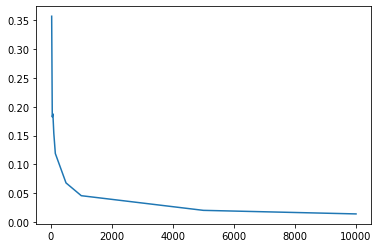

In [55]:

# для уровня 0.99
plt.plot(evs[:-1], [(i[-1][1] - i[-1][0]) for i in ints[:-1]])